In [1]:
import pandas as pd
import numpy as np
from joblib import dump

# SKLearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import seaborn as sns


## Load the training data set

In [2]:
df_standard = np.load('../data/processed/df_standard.npy')
target_var = np.load('../data/processed/target_var.npy')

print("Standardised samples:")
print("Dimension of features training data", df_standard.shape)
print("Dimension of target training data", target_var.shape)

Standardised samples:
Dimension of features training data (8000, 20)
Dimension of target training data (8000,)


In [3]:
X_ftrain = pd.DataFrame(df_standard, 
             columns=['ID',
                 'Games Played', 
    'Minutes Played',
    'Points Per Game',
    'Field Goals Made',
    'Field Goals Attempts',
    'Field Goals Percent',
    '3Points Made',
    '3Points Attempts',
    '3Points Percent',
    'Free Throw Made',
    'Free Throw Attempts',
    'Free Throw Percent',
    'Offensive Rebounds',
    'Defensive Rebounds',
    'Rebounds',
    'Assists',
    'Steals',
    'Blocks',
    'Turnovers'])

X_ftrain.head()

,ID,Games Played,Minutes Played,Points Per Game,Field Goals Made,Field Goals Attempts,Field Goals Percent,3Points Made,3Points Attempts,3Points Percent,Free Throw Made,Free Throw Attempts,Free Throw Percent,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers
0,-1.731834,1.006100,0.640574,0.123403,0.113959,0.047090,0.177269,-0.428374,-0.486911,0.188493,0.655953,0.760387,0.070392,1.428377,-0.121037,0.266040,1.161949,1.107242,-0.055071,0.473210
1,-1.731401,0.714005,0.360766,0.748626,0.822648,0.465578,1.704465,-1.469853,-1.712288,0.957140,1.087875,1.319370,-0.341888,3.210407,1.100107,1.608950,-0.681844,-0.364787,0.432148,0.196671
2,-1.730968,1.298195,0.058574,-0.640758,-0.535673,-0.482994,-0.293888,0.352736,0.361427,0.919645,-1.071732,-1.076272,0.415557,-0.608229,-0.264701,-0.405415,-0.608092,-0.610125,-0.055071,-0.909485
3,-1.730535,0.012976,0.058574,0.216029,0.409246,0.130788,1.282049,0.092366,-0.015612,0.257234,-0.531830,-0.357579,-0.428180,-0.353653,-0.121037,-0.117649,0.129425,-0.610125,-0.176876,0.888019
4,-1.730102,0.012976,-0.086926,-0.826009,-0.653788,-0.789885,1.005854,0.613106,0.549947,-0.367682,-1.287692,-1.156127,-1.665021,1.682952,0.381787,0.793612,-0.903099,-0.610125,0.432148,-0.771215


In [4]:
y_ftrain = pd.DataFrame(target_var, 
             columns=['TARGET_5Yrs'])

y_ftrain.head()

,TARGET_5Yrs
0,1
1,1
2,1
3,1
4,1


## Train Logistic Model - all features

In [5]:
cols=['Games Played', 
    'Minutes Played',
    'Points Per Game',
    'Field Goals Made',
    'Field Goals Attempts',
    'Field Goals Percent',
    '3Points Made',
    '3Points Attempts',
    '3Points Percent',
    'Free Throw Made',
    'Free Throw Attempts',
    'Free Throw Percent',
    'Offensive Rebounds',
    'Defensive Rebounds',
    'Rebounds',
    'Assists',
    'Steals',
    'Blocks',
    'Turnovers']

In [6]:
import statsmodels.api as sm

logit_model=sm.Logit(y_ftrain,X_ftrain)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.671650
         Iterations 5
                           Results: Logit
Model:               Logit             Pseudo R-squared:  -0.492    
Dependent Variable:  TARGET_5Yrs       AIC:               10786.4071
Date:                2022-11-30 12:00  BIC:               10926.1511
No. Observations:    8000              Log-Likelihood:    -5373.2   
Df Model:            19                LL-Null:           -3600.7   
Df Residuals:        7980              LLR p-value:       1.0000    
Converged:           1.0000            Scale:             1.0000    
No. Iterations:      5.0000                                         
--------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
--------------------------------------------------------------------
ID                    0.0094   0.0229  0.4120 0.6803 -0.0354  0.0542
Games Played          0.2715

In [7]:
cols=['Games Played', 
    # 'Minutes Played',
    # 'Points Per Game',
    # 'Field Goals Made',
    'Field Goals Attempts',
    'Field Goals Percent',
    '3Points Made',
    '3Points Attempts',
    # '3Points Percent',
    # 'Free Throw Made',
    # 'Free Throw Attempts',
    # 'Free Throw Percent',
    # 'Offensive Rebounds',
    # 'Defensive Rebounds',
    # 'Rebounds',
    # 'Assists',
    # 'Steals',
    'Blocks'
    # 'Turnovers'
     ]

X=X_ftrain[cols]
y=y_ftrain

logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.673087
         Iterations 5
                           Results: Logit
Model:               Logit             Pseudo R-squared:  -0.495    
Dependent Variable:  TARGET_5Yrs       AIC:               10781.3882
Date:                2022-11-30 12:00  BIC:               10823.3114
No. Observations:    8000              Log-Likelihood:    -5384.7   
Df Model:            5                 LL-Null:           -3600.7   
Df Residuals:        7994              LLR p-value:       1.0000    
Converged:           1.0000            Scale:             1.0000    
No. Iterations:      5.0000                                         
--------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
--------------------------------------------------------------------
Games Played          0.2909   0.0287 10.1341 0.0000  0.2346  0.3471
Field Goals Attempts  0.0746

In [8]:
cols=['Games Played', 
    # 'Minutes Played',
    # 'Points Per Game',
    # 'Field Goals Made',
    'Field Goals Attempts',
    'Field Goals Percent',
    '3Points Made',
    '3Points Attempts'
    # '3Points Percent',
    # 'Free Throw Made',
    # 'Free Throw Attempts',
    # 'Free Throw Percent',
    # 'Offensive Rebounds',
    # 'Defensive Rebounds',
    # 'Rebounds',
    # 'Assists',
    # 'Steals',
    # 'Blocks',
    # 'Turnovers'
     ]

X=X_ftrain[cols]
y=y_ftrain

logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.673349
         Iterations 4
                           Results: Logit
Model:               Logit             Pseudo R-squared:  -0.496    
Dependent Variable:  TARGET_5Yrs       AIC:               10783.5826
Date:                2022-11-30 12:00  BIC:               10818.5186
No. Observations:    8000              Log-Likelihood:    -5386.8   
Df Model:            4                 LL-Null:           -3600.7   
Df Residuals:        7995              LLR p-value:       1.0000    
Converged:           1.0000            Scale:             1.0000    
No. Iterations:      4.0000                                         
--------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
--------------------------------------------------------------------
Games Played          0.2928   0.0287 10.2116 0.0000  0.2366  0.3491
Field Goals Attempts  0.0838

## Data prep for Logistic Regression with Sklearn

In [9]:
alltrain = np.load('../data/processed/alltrain.npy')

print("Dimension of training data - unsplit", alltrain.shape)

Dimension of training data - unsplit (8000, 21)


In [10]:
df_alltrain = pd.DataFrame(alltrain, 
             columns=['ID',
                 'Games Played', 
    'Minutes Played',
    'Points Per Game',
    'Field Goals Made',
    'Field Goals Attempts',
    'Field Goals Percent',
    '3Points Made',
    '3Points Attempts',
    '3Points Percent',
    'Free Throw Made',
    'Free Throw Attempts',
    'Free Throw Percent',
    'Offensive Rebounds',
    'Defensive Rebounds',
    'Rebounds',
    'Assists',
    'Steals',
    'Blocks',
    'Turnovers',
     'TARGET_5Yrs'
                     ])

df_alltrain['TARGET_5Yrs'] = df_alltrain['TARGET_5Yrs'].astype(dtype ='int64')
df_alltrain['ID'] = df_alltrain['ID'].astype(dtype ='str')

df_alltrain.head()

,ID,Games Played,Minutes Played,Points Per Game,Field Goals Made,Field Goals Attempts,Field Goals Percent,3Points Made,3Points Attempts,3Points Percent,...,Free Throw Attempts,Free Throw Percent,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers,TARGET_5Yrs
0,3799.0,80.0,24.3,7.8,3.0,6.4,45.7,0.1,0.3,22.6,...,2.9,72.1,2.2,2.0,3.8,3.2,1.1,0.2,1.6,1
1,3800.0,75.0,21.8,10.5,4.2,7.9,55.1,-0.3,-1.0,34.9,...,3.6,67.8,3.6,3.7,6.6,0.7,0.5,0.6,1.4,1
2,3801.0,85.0,19.1,4.5,1.9,4.5,42.8,0.4,1.2,34.3,...,0.6,75.7,0.6,1.8,2.4,0.8,0.4,0.2,0.6,1
3,3802.0,63.0,19.1,8.2,3.5,6.7,52.5,0.3,0.8,23.7,...,1.5,66.9,0.8,2.0,3.0,1.8,0.4,0.1,1.9,1
4,3803.0,63.0,17.8,3.7,1.7,3.4,50.8,0.5,1.4,13.7,...,0.5,54.0,2.4,2.7,4.9,0.4,0.4,0.6,0.7,1


In [11]:
# df_features = df_alltrain[df_alltrain.columns[~df_alltrain.columns.isin(['ID', 'TARGET_5Yrs'])]]
# df_target = df_alltrain['TARGET_5Yrs']

df_features = df_alltrain[['Games Played',
                           'Field Goals Attempts',
                           'Field Goals Percent',
                           '3Points Made',
                           '3Points Attempts']]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features = scaler.fit_transform(df_features)

target = df_alltrain.pop('TARGET_5Yrs')

print("Standardised:")
print("Dimension of features training data", features.shape)
print("Dimension of target training data", target.shape)

Standardised:
Dimension of features training data (8000, 5)
Dimension of target training data (8000,)


In [12]:
features

array([[ 1.00610018,  0.04709033,  0.17726855, -0.42837351, -0.48691065],
       [ 0.71400493,  0.46557805,  1.7044653 , -1.46985294, -1.71228771],
       [ 1.29819543, -0.48299411, -0.29388789,  0.35273606,  0.36142732],
       ...,
       [ 1.29819543,  0.77246904,  0.07978791, -0.16800365, -0.20413132],
       [-1.38908087, -1.09677609, -0.73255079, -1.46985294, -1.24098884],
       [-0.80489037, -0.31559902, -1.95105884,  1.13384564,  1.49254461]])

In [13]:
target

0       1
1       1
2       1
3       1
4       1
       ..
7995    1
7996    1
7997    1
7998    1
7999    1
Name: TARGET_5Yrs, Length: 8000, dtype: int64

In [14]:
# Split randomly the dataset with random_state=8 into 2 different sets: training data (80%) and validation data (20%)
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split (features, 
                                                   target,
                                                   test_size=0.2,
                                                   random_state=8
                                                  )

print("Standardised samples:")
print("Dimension of features training data", X_train.shape)
print("Dimension of target training data", y_train.shape)
print("Dimension of features validation data", X_val.shape)
print("Dimension of targer validation data", y_val.shape)


Standardised samples:
Dimension of features training data (6400, 5)
Dimension of target training data (6400,)
Dimension of features validation data (1600, 5)
Dimension of targer validation data (1600,)


### Test Data

In [15]:
test = np.load('../data/processed/test.npy')

print("Dimension of test data", test.shape)

Dimension of test data (3799, 20)


In [16]:
df_test = pd.DataFrame(test, 
             columns=['ID',
                 'Games Played', 
    'Minutes Played',
    'Points Per Game',
    'Field Goals Made',
    'Field Goals Attempts',
    'Field Goals Percent',
    '3Points Made',
    '3Points Attempts',
    '3Points Percent',
    'Free Throw Made',
    'Free Throw Attempts',
    'Free Throw Percent',
    'Offensive Rebounds',
    'Defensive Rebounds',
    'Rebounds',
    'Assists',
    'Steals',
    'Blocks',
    'Turnovers'
                     ])

df_test['ID'] = df_alltrain['ID'].astype(dtype ='str')

df_test.head()

,ID,Games Played,Minutes Played,Points Per Game,Field Goals Made,Field Goals Attempts,Field Goals Percent,3Points Made,3Points Attempts,3Points Percent,Free Throw Made,Free Throw Attempts,Free Throw Percent,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers
0,3799.0,56.0,9.1,4.0,1.6,3.7,43.7,0.1,0.3,7.3,0.7,1.2,63.4,1.2,0.8,1.7,0.4,0.2,0.3,0.8
1,3800.0,43.0,19.3,10.1,3.7,8.1,46.0,0.6,1.7,35.1,1.8,2.5,75.3,0.5,0.9,1.5,3.5,0.6,0.0,1.8
2,3801.0,82.0,33.9,11.3,4.9,10.6,45.6,0.5,1.9,44.8,1.8,2.7,71.2,1.3,3.3,4.5,2.5,1.3,0.3,2.0
3,3802.0,86.0,44.7,18.8,6.8,15.9,42.9,0.5,1.8,13.5,4.5,6.3,70.9,1.5,3.2,5.0,4.1,0.9,0.1,3.6
4,3803.0,58.0,12.3,4.7,1.6,4.0,40.0,0.5,1.7,38.7,1.1,1.3,76.9,0.2,0.6,0.9,1.5,0.5,-0.4,0.9


In [17]:
df_features_test = df_test[['Games Played',
                           'Field Goals Attempts',
                           'Field Goals Percent',
                           '3Points Made',
                           '3Points Attempts']]

X_test = scaler.fit_transform(df_features_test)

print("Standardised test data:")
print("Dimension of features test data", X_test.shape)

Standardised test data:
Dimension of features test data (3799, 5)


In [18]:
X_test

array([[-0.3996569 , -0.72723142, -0.14886955, -0.40941771, -0.47203298],
       [-1.15769727,  0.50224806,  0.23196471,  0.90313746,  0.85785081],
       [ 1.11642385,  1.20081595,  0.16573266,  0.64062642,  1.04783421],
       ...,
       [-0.57458929, -1.25814302, -0.24821762, -1.72197287, -1.32695828],
       [ 1.52459944,  1.53612854,  0.09950062,  0.64062642,  0.38289231],
       [-0.4579677 , -1.06254401, -0.38068171, -0.40941771, -0.18705788]])

## Apply the Logistic Regression with Sklearn

##### Create an instance of logistic regression

In [19]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(penalty = 'l2', #use L2 regularisation
                           dual = False, #dual problem
                           tol = 0.0001,
                           C = 1.0,
                           fit_intercept = True,
                           intercept_scaling = 1,
                           class_weight = None,
                           random_state = None,
                           solver = 'liblinear',
                           max_iter = 100,
                           multi_class = 'ovr',
                           verbose = 0,
                           warm_start = False,
                           n_jobs = 1,
                           l1_ratio = None
                          )

In [20]:
logreg.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', n_jobs=1, solver='liblinear')

In [21]:
#Dump the model
# from joblib import dump
dump(logreg,  '../models/logreg_sklearn_subset1.joblib')

['../models/logreg_sklearn_subset1.joblib']

## Generate Predictions (added in Week 2)

In [22]:
#Save the predictions from this model for training and validation sets into 2 variables

# y_train_prediction = logreg.predict(X_train)
# y_train_probabilities = logreg.predict_proba(X_train)

# y_val_prediction = logreg.predict(X_val)
# y_val_probabilities = logreg.predict_proba(X_val)

# y_test_prediction = logreg.predict(X_test)
# y_test_probabilities = logreg.predict_proba(X_test)




y_pred_ontrain = logreg.predict(X_train) 
y_pred_onval = logreg.predict(X_val) # official

y_proba_ontrain = logreg.predict_proba(X_train) 
y_proba_onval = logreg.predict_proba(X_val) # official

## Evaluation

### Accuracy

In [23]:
from sklearn.metrics import accuracy_score

print('Accuracy of logistic regression classifier on train set', accuracy_score(y_train, y_pred_ontrain)*100)
print('Accuracy of logistic regression classifier on validation set', accuracy_score(y_val, y_pred_onval)*100)


Accuracy of logistic regression classifier on train set 83.40625
Accuracy of logistic regression classifier on validation set 83.625


In [24]:
print('Accuracy of logistic regression classifier on train set: {:.5f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_val, y_val)))


Accuracy of logistic regression classifier on train set: 0.83406
Accuracy of logistic regression classifier on test set: 0.84


## Model Evaluation

### Confusion Matrix

In [30]:
cnf_matrix = metrics.confusion_matrix(y_val, y_pred_onval)
cnf_matrix

array([[   5,  252],
       [  10, 1333]])

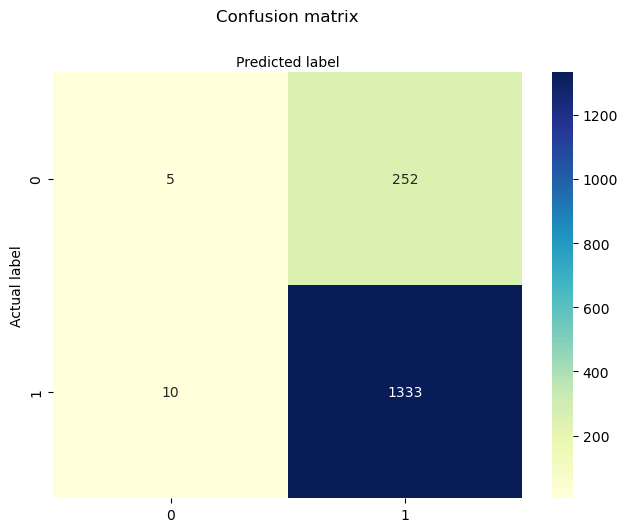

In [31]:
class_names = [0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

### Accuracy, Precision, and Recall

In [32]:
target_names = ['career years played < 5', 'career years played >= 5']
print(classification_report(y_val, y_pred_onval, target_names=target_names))

                          precision    recall  f1-score   support

 career years played < 5       0.33      0.02      0.04       257
career years played >= 5       0.84      0.99      0.91      1343

                accuracy                           0.84      1600
               macro avg       0.59      0.51      0.47      1600
            weighted avg       0.76      0.84      0.77      1600



### ROC

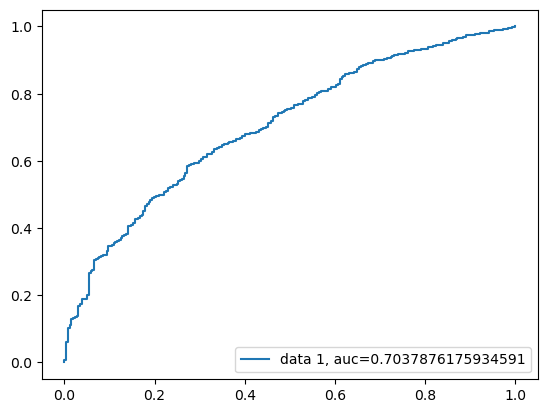

In [33]:
# y_pred_proba = logreg.predict_proba(X_test)[::,1]
y_proba_onval = logreg.predict_proba(X_val)[::,1]  # official
fpr, tpr, _ = metrics.roc_curve(y_val,  y_proba_onval)
auc = metrics.roc_auc_score(y_val, y_proba_onval)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()